In [15]:
import sys
sys.path.append('/home/socolovsky_lab/ccount/ccount/workflow/scripts')
from ccount.blob.io import load_locs, save_crops, load_crops
from ccount.blob.misc import crops_stat
from ccount.clas.pca_tsne import pca_tsne


from ccount.img.read_czi import read_czi, parse_image_arrays
from ccount.blob.crop_blobs import crop_blobs
from ccount.blob.plot import plot_flat_crop, plot_flat_crops, pop_label_flat_crops, show_rand_crops

import numpy as np
import pandas as pd
import subprocess

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# show file names of all blobs that needs to be labeled
%ls ../../res/blob_locs/
#%ls ../../res/classification1/pos/

1unitEpo_1-Stitching-01.0.locs.npy.gz*
1unitEpo_1-Stitching-01.1.locs.npy.gz*
1unitEpo_1-Stitching-01.2.locs.npy.gz*
1unitEpo_1-Stitching-01.3.locs.npy.gz*
1unitEpo_2-Stitching-02.0.locs.npy.gz*
1unitEpo_2-Stitching-02.1.locs.npy.gz*
1unitEpo_2-Stitching-02.2.locs.npy.gz*
1unitEpo_2-Stitching-02.3.locs.npy.gz*
1unitEpo_3-Stitching-03.0.locs.npy.gz*
1unitEpo_3-Stitching-03.1.locs.npy.gz*
1unitEpo_3-Stitching-03.2.locs.npy.gz*
1unitEpo_3-Stitching-03.3.locs.npy.gz*
1unitEpo_4-Stitching-04.0.locs.npy.gz*
1unitEpo_4-Stitching-04.1.locs.npy.gz*
1unitEpo_4-Stitching-04.2.locs.npy.gz*
1unitEpo_4-Stitching-04.3.locs.npy.gz*
NoEpo_1-Stitching-05.0.locs.npy.gz*
NoEpo_1-Stitching-05.1.locs.npy.gz*
NoEpo_1-Stitching-05.2.locs.npy.gz*
NoEpo_1-Stitching-05.3.locs.npy.gz*
NoEpo_2-Stitching-06.0.locs.npy.gz*
NoEpo_2-Stitching-06.1.locs.npy.gz*
NoEpo_2-Stitching-06.2.locs.npy.gz*
NoEpo_2-Stitching-06.3.locs.npy.gz*
NoEpo_3-Stitching-07.0.locs.npy.gz*
NoEpo_3-Stitching-07.1.locs.npy.gz*
NoEpo_3-Stitchin

# User Parameters

In [3]:
# pos/clas.npy.gz, blob_crops/crops.npy.gz, or blob_locs/locs.npy.gz
loc_file = '../../res/blob_locs/point05unitsEpo_1-Stitched.0.locs.npy.gz'  

image_index = 0  # 0 if loc_file = 'xxx.0.locs.npy.gz'

# corresponding czi file (must match loc_file)
czi_file = '../../data/point05unitsEpo_1-Stitched.czi'  

## output file name, please don't over-write important files!!!
out_name = '../../res/labeled/point05unitsEpo_1-Stitched.0.labeled.npy.gz' # file name to be saved in, will over-write existing files

In [18]:
# for testing

# pos/clas.npy.gz, blob_crops/crops.npy.gz, or blob_locs/locs.npy.gz
loc_file = '../../res2/blob_locs/1unitEpo_1-Stitching-01.0.locs.npy.gz'  

image_index = 0  # 0 if loc_file = 'xxx.0.locs.npy.gz'

# corresponding czi file (must match loc_file)
czi_file = '../../data2/1unitEpo_1-Stitching-01.czi'  

## output file name, please don't over-write important files!!!
out_name = '../../res2/labeled/1unitEpo_1-Stitching-01.0.labeled.npy.gz' # file name to be saved in, will over-write existing files

# Read Data

In [21]:
locs = load_locs(loc_file)  # contains x,y,z in the first 3 columns

../../res2/blob_locs/1unitEpo_1-Stitching-01.0.locs.npy.gz (4659, 3)


In [22]:
czi = read_czi(czi_file)  # image array of 4 scanned areas
image = parse_image_arrays(czi, i=image_index)  # one of the scanned areas, takes 30s to load
czi=[] # release RAM
# np.save("image.npy", image)  # save temp file for quick reload
# image = np.load('image.npy')

read_czi: ../../data2/1unitEpo_1-Stitching-01.czi
(4, 1, 70665, 66241, 1)


# View Data

showing blob 4207


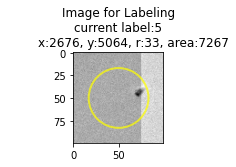

In [39]:
i = np.random.choice(len(locs))
print('showing blob {}'.format(i))

crops = crop_blobs(locs[i:i+1], image, crop_width=50)  # User can change crop_width, 500 for overview
p = plot_flat_crop(crops[0, :],  image_scale=1)

## Labeling

In [ ]:
crops = crop_blobs(locs, image, crop_width=400)

In [ ]:
crops = pop_label_flat_crops(crops, random = True, seed = 1, skip_labels = [0, 1])

In [ ]:
crops = pop_label_flat_crops(crops, random = True, seed = 1, skip_labels = [0, 1])

## Save

In [ ]:
# decide output name and save
locs[:, 3] = crops[:, 3]
s = input ("would you like to save/over-write {} ? (y/n)".format(out_name))
if s == 'y':
    save_crops(locs, out_name)
else:
    print('exit without saving')

# Review Labeled DB (Optional)

In [ ]:
labeled = load_crops(out_name)

In [ ]:
## labeled as YES
_ = show_rand_crops(crops=labeled, label_filter=1, num_shown=3)

In [ ]:
## labeled as NO
_ = show_rand_crops(crops=labeled, label_filter=0, num_shown=2)

In [ ]:
# any label (Optional)
_ = show_rand_crops(crops=labeled, label_filter='na', num_shown=3)

## Unsupervised classification (overview of blobs) (Optional)

In [ ]:
crops_stat(crops)

In [ ]:
cluster_info = pd.DataFrame(crops[:, 3], columns=['cluster_id'])
tsne_df = pca_tsne(pd.DataFrame(crops), cluster_info=cluster_info)